In [1]:
# Importando Bibliotecas

import pandas as pd
import numpy as np
import matplotlib as plt



## Base de dados

- Coletados na Web: Aluguel de carros nos EUA.

In [2]:
# Carregando a base de dados e fazendo os checks iniciais

# Muda o diretório de trabalho 
import os
os.chdir("C:\\Users\\User\\Documents\\Bases de dados")

df1=pd.read_csv("car.csv", sep = ",")

df1.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010


In [3]:
df1.info

<bound method DataFrame.info of       fuelType  rating  renterTripsTaken  reviewCount location.city  \
0     ELECTRIC    5.00                13           12       Seattle   
1     ELECTRIC    5.00                 2            1       Tijeras   
2       HYBRID    4.92                28           24   Albuquerque   
3     GASOLINE    5.00                21           20   Albuquerque   
4     GASOLINE    5.00                 3            1   Albuquerque   
...        ...     ...               ...          ...           ...   
5846  GASOLINE    5.00                32           27      Honolulu   
5847    HYBRID    5.00                17           16          Aiea   
5848  GASOLINE    4.94                18           17        Kailua   
5849  GASOLINE     NaN                 1            0       Waipahu   
5850  GASOLINE    5.00                16           14        Kailua   

     location.country  location.latitude  location.longitude location.state  \
0                  US          47.44

In [4]:
df1.describe()

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
count,5350.000000,5851.000000,5851.000000,5851.000000,5851.000000,5.851000e+03,5851.000000,5851.000000
mean,4.920325,33.477354,28.454794,35.582889,-99.632773,6.034830e+06,93.691506,2015.340113
std,0.182425,41.898954,35.136113,6.431408,20.391476,4.646022e+06,96.080920,4.050813
min,1.000000,0.000000,0.000000,21.272565,-158.165693,5.105000e+03,20.000000,1955.000000
25%,4.900000,5.000000,4.000000,30.453623,-117.158285,1.917451e+06,45.000000,2014.000000
50%,5.000000,18.000000,16.000000,35.554502,-95.673319,4.968749e+06,69.000000,2016.000000
75%,5.000000,46.000000,39.000000,39.996864,-81.538631,9.657496e+06,110.000000,2018.000000
max,5.000000,395.000000,321.000000,64.893610,-68.823637,1.581088e+07,1500.000000,2020.000000


In [5]:
df1.columns

Index(['fuelType', 'rating', 'renterTripsTaken', 'reviewCount',
       'location.city', 'location.country', 'location.latitude',
       'location.longitude', 'location.state', 'owner.id', 'rate.daily',
       'vehicle.make', 'vehicle.model', 'vehicle.type', 'vehicle.year'],
      dtype='object')

### Aluguel de carros no Estados Unidos

- Gráfico que mostra a distrubuição dos aluguéis no território americano

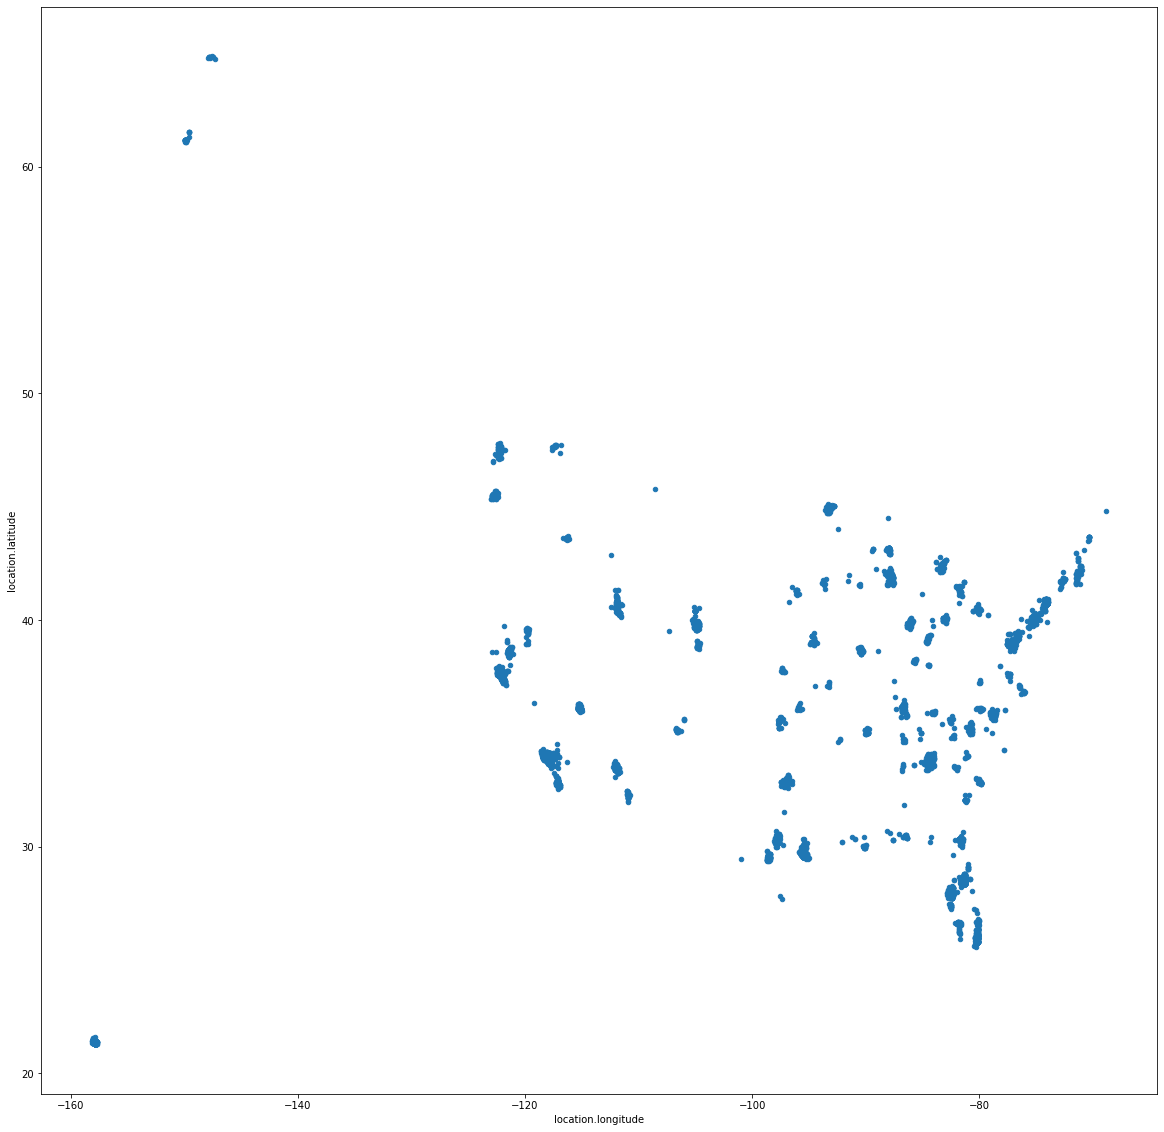

In [6]:
df1.plot.scatter(y = 'location.latitude', x = 'location.longitude', figsize = (20, 20));

In [8]:
import requests
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy import stats
import time
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

### Análise de preço 

- Gráfico que mostra o número de veículos em cada faixa de preço em relação com a quantidade de dólares gastos por dia.

C:\ProgramData\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


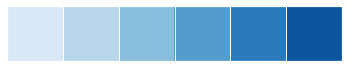

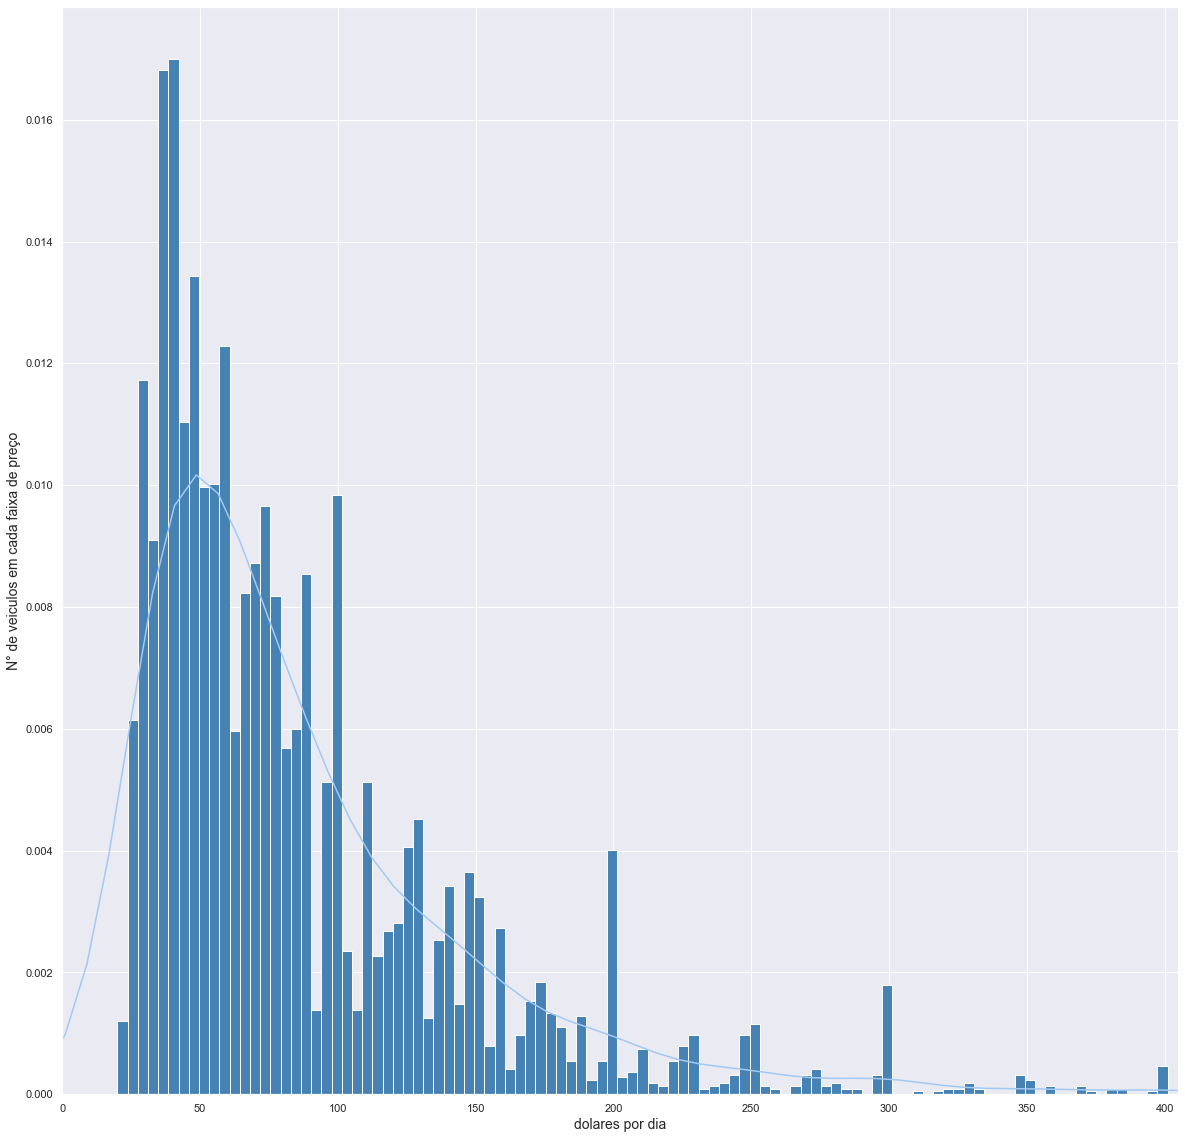

In [68]:
sns.set(font_scale=1.3)
sns.set(style="darkgrid", palette="muted")
sns.palplot(sns.color_palette("Blues"))
sns.set_color_codes("pastel")
a4_dims = (20, 20)
x = df1['rate.daily']
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.distplot(x, 
             bins=400, 
             kde=True, color='b', 
             hist_kws={"alpha":None, "color":'steelblue'}
            )
plt.xlim(0, 405);
ax.set_ylabel('N° de veiculos em cada faixa de preço', fontsize=14);
ax.set_xlabel('dolares por dia', fontsize=14);

### Análise de Marcas em relação a quantidade de dólares gastos no dia.

- O grafico nos mostra as marcas de carros e a quantia alocada para cada.

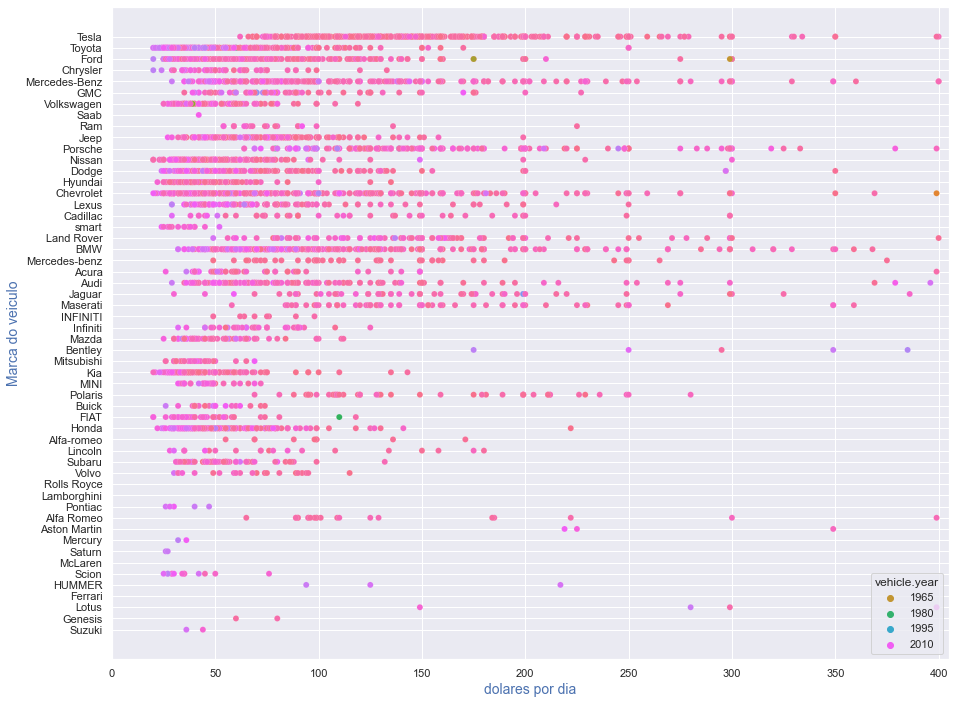

In [41]:

sns.set(style="darkgrid")
fig, ax = pyplot.subplots(figsize=(15,12))
sns.scatterplot(data=df1, x='rate.daily', y='vehicle.make', 
                hue='vehicle.year',
                palette="husl",
                linewidth=.1,
               
               
               )
plt.xlim(0, 405)
ax.set_ylabel('Marca do veiculo', fontsize=14, color='b');
ax.set_xlabel('dólares por dia', fontsize=14, color='b');


## Gráfico de locação por marcas

- Esse gráfico nos mostra as contagens de locação por cada marca.

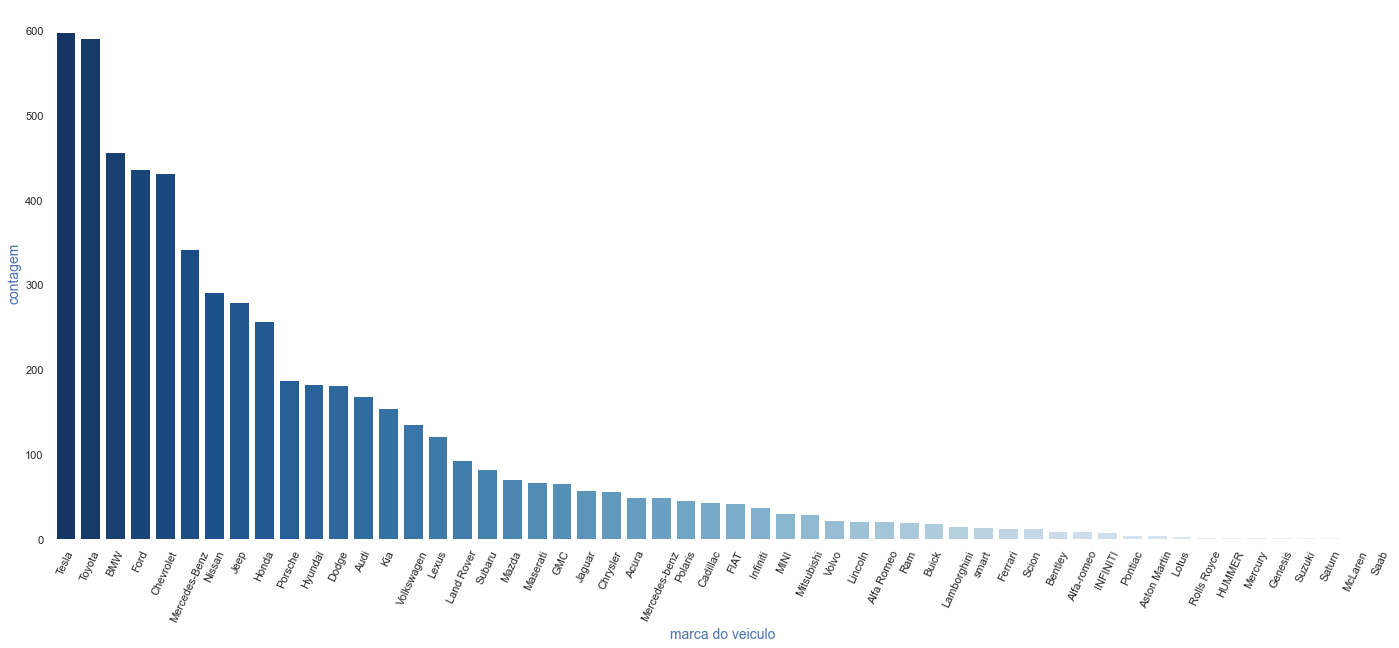

In [40]:
sns.set_context("notebook")
sns.set_color_codes("dark")
sns.set(style="white")


a4_dims = (24.00, 9.80)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.xticks(rotation=65)

sns.countplot(x='vehicle.make', data=df1,
              order = df1['vehicle.make'].value_counts().index,
              #hue='vehicle.year'
              palette="Blues_r" #"BrBG" #"cubehelix" #"GnBu_d"    #"BuGn_r"     #"Set2"
           )
ax.set_ylabel('contagem', fontsize=14, color='b')
ax.set_xlabel('marca do veiculo', fontsize=14, color='b')
#plt.savefig('carVsCount.png', format='png')
sns.despine(left=True, bottom=True)

##  Análise de avaliações.

- O gráfico nos mostra as avaliações dadas pelos usuários.

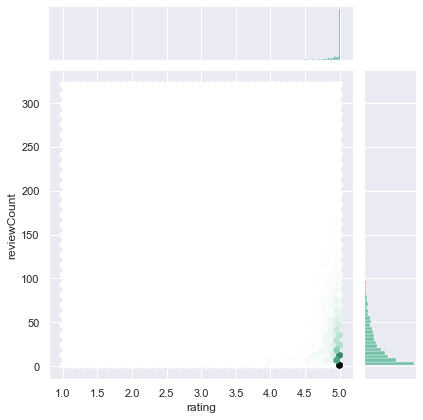

In [42]:
sns.jointplot(x=df1['rating'], y=df1['reviewCount'],
                #data=df,
              
              kind="hex", 
              #size= 7,
              color="#4CB391")

### Análise dos modelos de carros

- Modelo de carros por dolares por dia

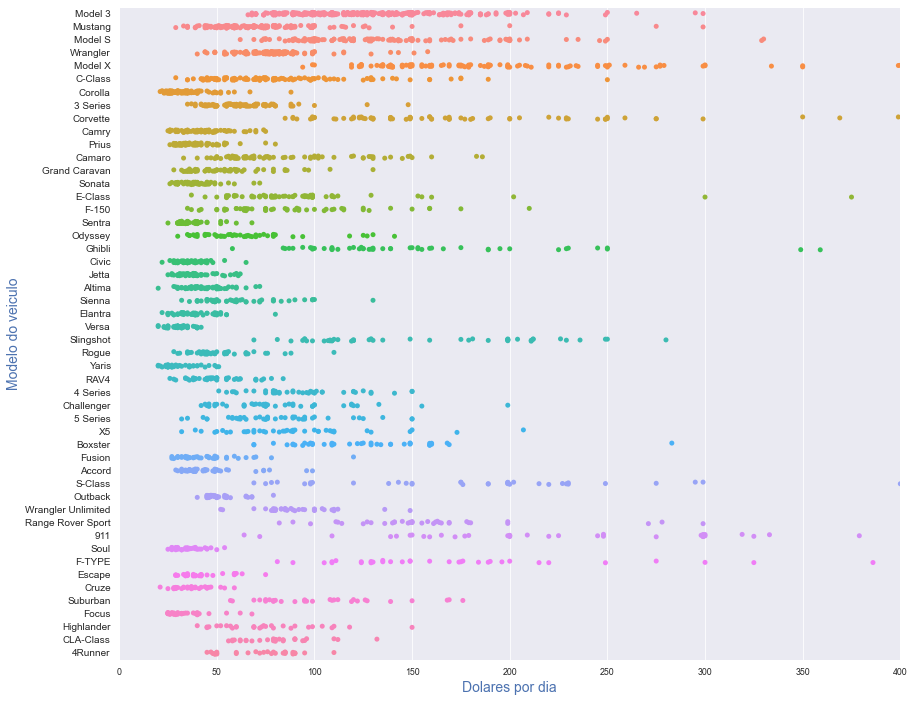

In [46]:
sns.set(style="darkgrid")
sns.set_context("paper")
a4_dimsRel2 = (14, 12)
fig, ax = pyplot.subplots(figsize=a4_dimsRel2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.stripplot(x="rate.daily", y="vehicle.model", data=df1,
order = df1['vehicle.model'].value_counts().iloc[:50].index  
                )


plt.xlim(0, 400)
plt.yticks(fontsize=10)
ax.set_ylabel('Modelo do veiculo', fontsize=14, color='b');
ax.set_xlabel('Dolares por dia', fontsize=14, color='b');

In [47]:
df1.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010


### Análise das cidades 

- Média de dolares gastos por cidade


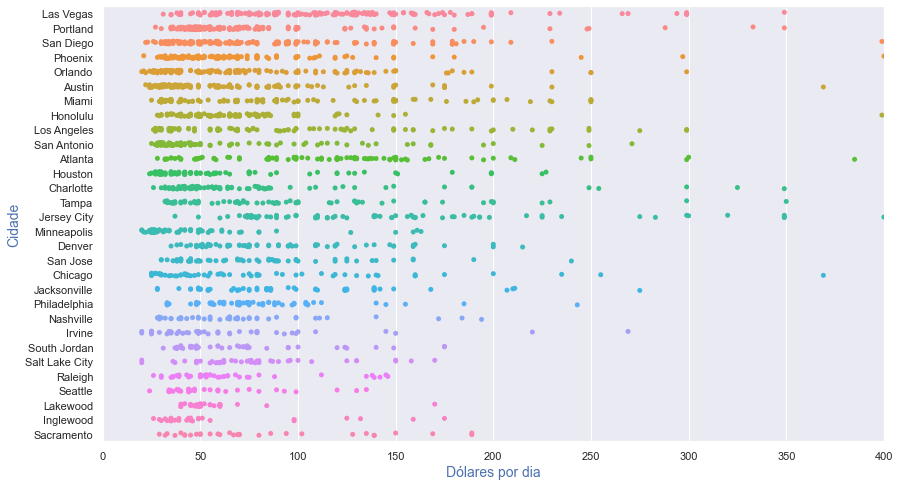

In [50]:
sns.set(style="darkgrid")
a4_dimsRel2 = (14, 8)
fig, ax = pyplot.subplots(figsize=a4_dimsRel2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.stripplot(x="rate.daily", y="location.city", data=df1,
                order = df1['location.city'].value_counts()\
                 .iloc[:30]\
                  .index
                )


plt.xlim(0, 400)
ax.set_ylabel('Cidade', fontsize=14, color='b');
ax.set_xlabel('Dólares por dia', fontsize=14, color='b');

### Análise por boxplot

- Dólares por Cidade

Text(0, 0.5, 'dólares por dia')

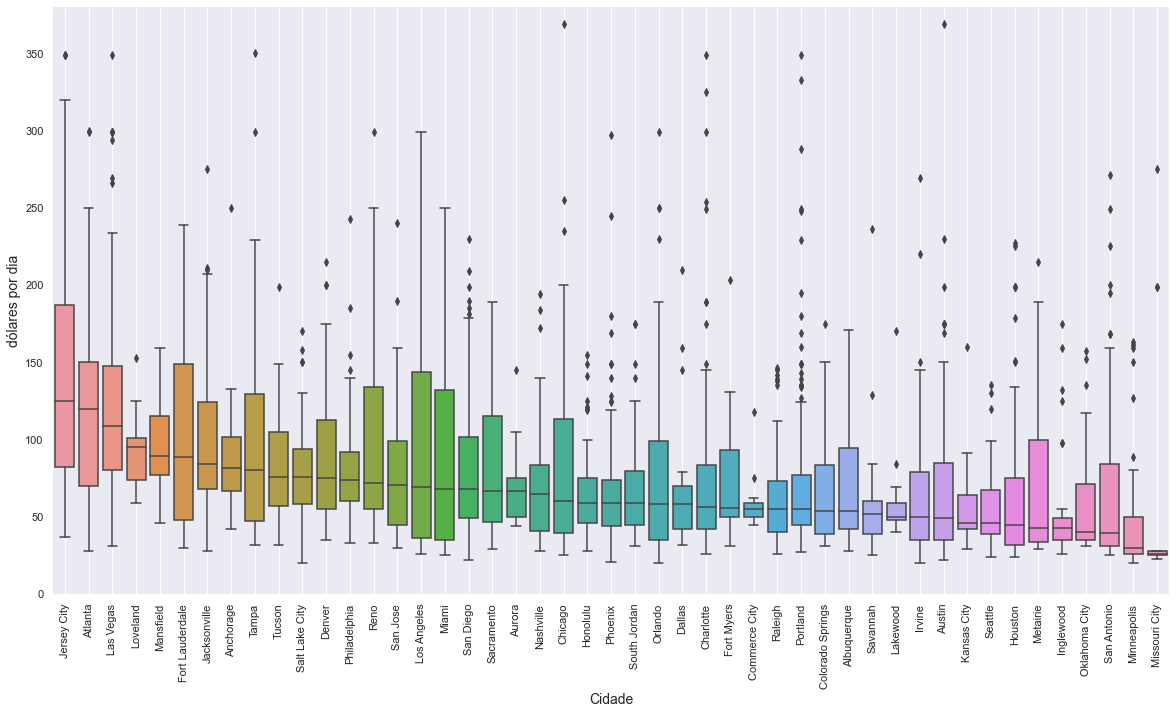

In [67]:
sns.set_context("notebook")
a4_dimsRel = (20.00, 10.80)
fig, ax = pyplot.subplots(figsize=a4_dimsRel)
sns.set(style="darkgrid")

sns.boxplot(y="rate.daily", x="location.city", 
                data=df1.groupby('location.city').filter(lambda x: len(x) >= 20),
              order = df1.groupby('location.city').filter(lambda x: len(x) >= 20)\
                     .groupby(['location.city']).median()\
                    .sort_values('rate.daily', ascending = False)\
                    #.iloc[0:50]
                     .index
             
             )

ax.xaxis.grid(True)
ax.yaxis.grid(False)
sns.despine(left=True, bottom=True)


plt.ylim(0, 380)
plt.xticks(rotation=90)
ax.set_xlabel('Cidade', fontsize=14)
ax.set_ylabel('dólares por dia', fontsize=14)

### Análise do número de viagens feitas por locação.

- Locação por dólares por dia.

Text(0.5, 0, 'Viagens feitas de locatário')

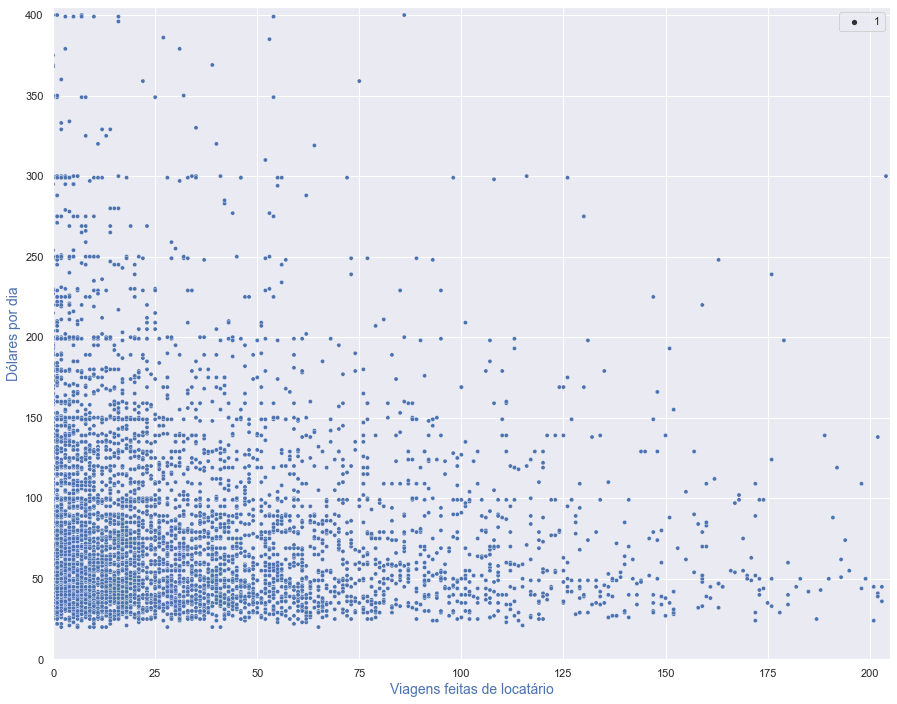

In [56]:
sns.set(style="darkgrid")
sns.set_context("notebook")
a4_dims = (15, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(data=df1, x='renterTripsTaken', y='rate.daily', 
                palette="ch:2,r=.1,l=.5_r",
                size=1,
)
plt.xlim(0, 205)
plt.ylim(0,405)
ax.set_ylabel('Dólares por dia', fontsize=14, color='b')
ax.set_xlabel('Viagens feitas de locatário', fontsize=14, color='b')

### Análise do número de viagens feitas.

- Viagens feitas por dólares por dia.

C:\ProgramData\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\anaconda\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'dolares por dia')

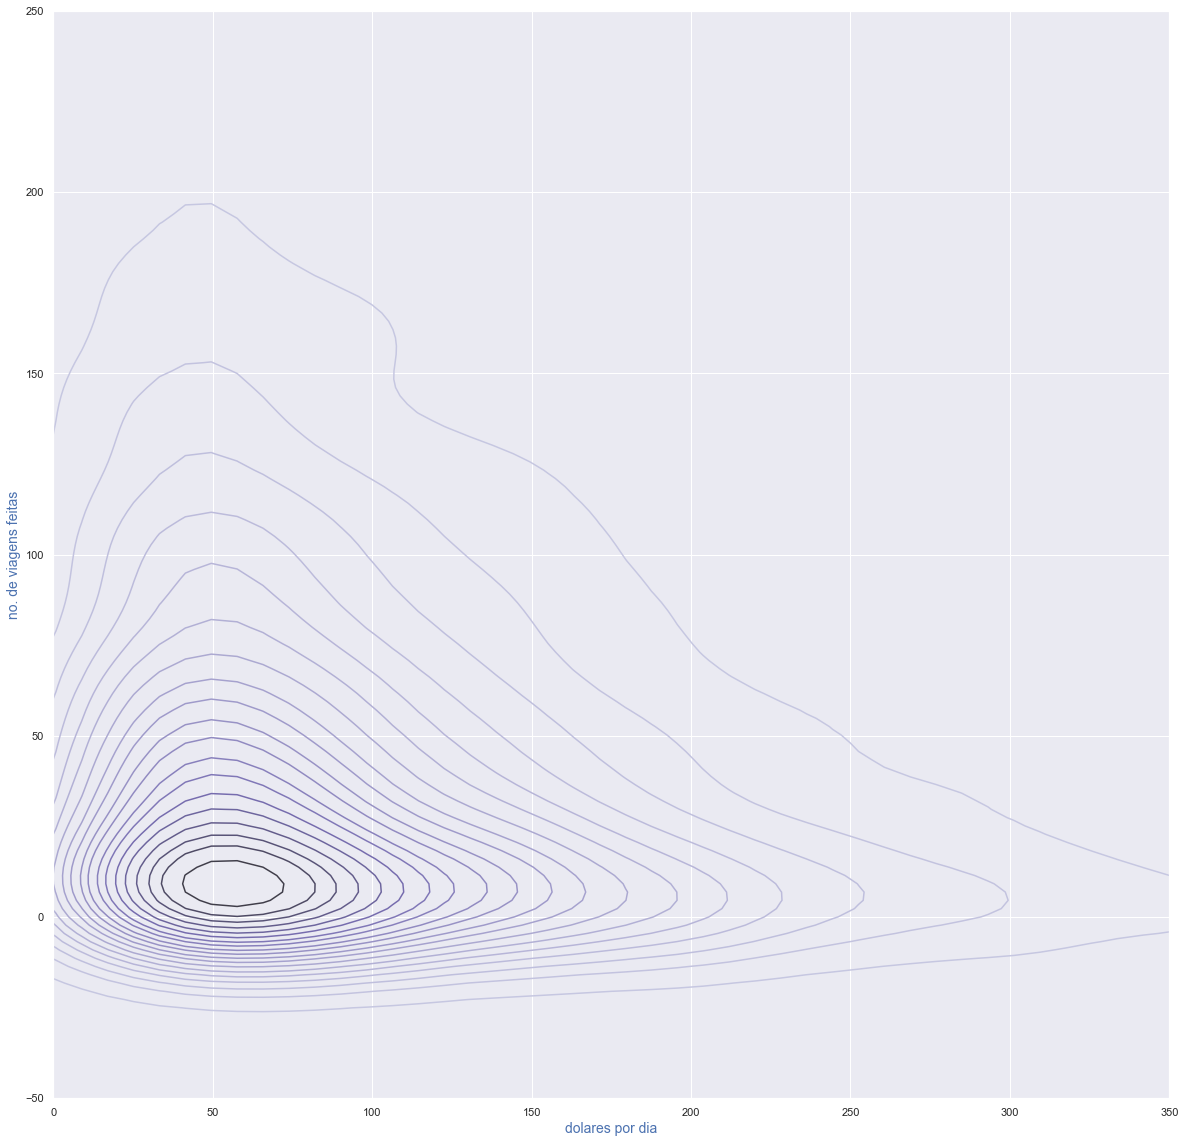

In [63]:
#sns.set(font_scale=1.3)
a4_dims = (20, 20)
x = df1['rate.daily']
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.kdeplot(x, df1.renterTripsTaken, shade=False, shade_lowest=False, cmap='Purples_d',  n_levels=20)
plt.xlim(0, 350)
plt.ylim(-50,250)
ax.set_ylabel('no. de viagens feitas', fontsize=14, color='b')
ax.set_xlabel('dolares por dia', fontsize=14, color='b')